DESAFIO 5 - MATHEUS HENRIQUE SILVA CAVALCANTE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CARREGAMENTO DA BASE DE DADOS E TRATAMENTO DOS DADOS

CARREGANDO A BASE DE DADOS E RENOMENDO PARA "relatorio_do_banco.csv"

In [2]:
df = pd.read_csv('relatorio_do_banco.csv')
df.columns = [col.upper() for col in df.columns]
df


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              999 non-null    int64  
 1   PONTOS          999 non-null    int64  
 2   ESTADO          999 non-null    object 
 3   GENERO          991 non-null    object 
 4   IDADE           999 non-null    int64  
 5   BENS            999 non-null    int64  
 6   SALDO NA CONTA  999 non-null    int64  
 7   PRODUTO         999 non-null    int64  
 8   POSSUI CARTAO   999 non-null    int64  
 9   ATIVO           999 non-null    int64  
 10  SALARIO         992 non-null    float64
 11  SAIU            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [4]:
df = df[(df['IDADE'] > 18) & (df['IDADE'] < 100)]
df.loc[:,'SAIU'] = df['SAIU'].replace({0: 'Não', 1: 'Sim'})
df.loc[:,'POSSUI CARTAO'] = df['POSSUI CARTAO'].replace({0: 'Não', 1: 'Sim'})
df.loc[:,'ATIVO'] = df['ATIVO'].replace({0: 'Não', 1: 'Sim'})
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,Sim,Sim,10134888.0,Sim
1,2,608,CE,Feminino,41,1,8380786,1,Não,Sim,11254258.0,Não
2,3,502,BA,Feminino,42,8,1596608,3,Sim,Não,11393157.0,Sim
3,4,699,BA,Feminino,39,1,0,2,Não,Não,9382663.0,Não
4,5,850,CE,Feminino,43,2,12551082,1,Sim,Sim,790841.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,Sim,Não,14576583.0,Não
995,997,610,CE,Masculino,29,9,0,3,Não,Sim,8391224.0,Não
996,998,811,CE,Masculino,44,3,0,2,Não,Sim,7843973.0,Não
997,999,587,CE,Masculino,62,7,12128627,1,Não,Sim,677692.0,Não


In [5]:

for col in df.select_dtypes(include=['float64', 'int64']).columns:

    unique_values=df[col].unique()

    if col== set(unique_values).issubset({0,1}):
      continue

    df.loc[:,col] = df[col].fillna(df[col].mean(numeric_only=True))
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df.loc[:,col] = df[col].apply(lambda x: df[col].median() if x < limite_inferior or x > limite_superior else x)

df.isnull().sum()
df


,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,Sim,Sim,10134888.0,Sim
1,2,608,CE,Feminino,41,1,8380786,1,Não,Sim,11254258.0,Não
2,3,502,BA,Feminino,42,8,1596608,3,Sim,Não,11393157.0,Sim
3,4,699,BA,Feminino,39,1,0,2,Não,Não,9382663.0,Não
4,5,850,CE,Feminino,43,2,12551082,1,Sim,Sim,790841.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,Sim,Não,14576583.0,Não
995,997,610,CE,Masculino,29,9,0,3,Não,Sim,8391224.0,Não
996,998,811,CE,Masculino,44,3,0,2,Não,Sim,7843973.0,Não
997,999,587,CE,Masculino,62,7,12128627,1,Não,Sim,677692.0,Não


In [6]:
df = df.copy()
df.drop_duplicates(subset=['ID'], keep='last', inplace=True)
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,Sim,Sim,10134888.0,Sim
1,2,608,CE,Feminino,41,1,8380786,1,Não,Sim,11254258.0,Não
2,3,502,BA,Feminino,42,8,1596608,3,Sim,Não,11393157.0,Sim
3,4,699,BA,Feminino,39,1,0,2,Não,Não,9382663.0,Não
4,5,850,CE,Feminino,43,2,12551082,1,Sim,Sim,790841.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,Sim,Não,14576583.0,Não
995,997,610,CE,Masculino,29,9,0,3,Não,Sim,8391224.0,Não
996,998,811,CE,Masculino,44,3,0,2,Não,Sim,7843973.0,Não
997,999,587,CE,Masculino,62,7,12128627,1,Não,Sim,677692.0,Não


In [7]:
df.replace({'Mas': 'Masculino', 'M': 'Masculino','Fem': 'Feminino','F': 'Feminino'}, inplace=True)
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,Sim,Sim,10134888.0,Sim
1,2,608,CE,Feminino,41,1,8380786,1,Não,Sim,11254258.0,Não
2,3,502,BA,Feminino,42,8,1596608,3,Sim,Não,11393157.0,Sim
3,4,699,BA,Feminino,39,1,0,2,Não,Não,9382663.0,Não
4,5,850,CE,Feminino,43,2,12551082,1,Sim,Sim,790841.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,Sim,Não,14576583.0,Não
995,997,610,CE,Masculino,29,9,0,3,Não,Sim,8391224.0,Não
996,998,811,CE,Masculino,44,3,0,2,Não,Sim,7843973.0,Não
997,999,587,CE,Masculino,62,7,12128627,1,Não,Sim,677692.0,Não


In [8]:
def formatar_real(valor):
  return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

df['SALARIO(R$)'] = df['SALARIO'].apply(formatar_real)
df['SALDO NA CONTA(R$)'] = df['SALDO NA CONTA'].apply(formatar_real)
df.loc[:, df.columns != 'SALARIO']
df.loc[:, df.columns != 'SALDO NA CONTA']

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU,SALARIO(R$),SALDO NA CONTA(R$)
0,1,619,BA,Feminino,42,2,1,Sim,Sim,10134888.0,Sim,"R$ 10.134.888,00","R$ 0,00"
1,2,608,CE,Feminino,41,1,1,Não,Sim,11254258.0,Não,"R$ 11.254.258,00","R$ 8.380.786,00"
2,3,502,BA,Feminino,42,8,3,Sim,Não,11393157.0,Sim,"R$ 11.393.157,00","R$ 1.596.608,00"
3,4,699,BA,Feminino,39,1,2,Não,Não,9382663.0,Não,"R$ 9.382.663,00","R$ 0,00"
4,5,850,CE,Feminino,43,2,1,Sim,Sim,790841.0,Não,"R$ 790.841,00","R$ 12.551.082,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,2,Sim,Não,14576583.0,Não,"R$ 14.576.583,00","R$ 12.310.588,00"
995,997,610,CE,Masculino,29,9,3,Não,Sim,8391224.0,Não,"R$ 8.391.224,00","R$ 0,00"
996,998,811,CE,Masculino,44,3,2,Não,Sim,7843973.0,Não,"R$ 7.843.973,00","R$ 0,00"
997,999,587,CE,Masculino,62,7,1,Não,Sim,677692.0,Não,"R$ 677.692,00","R$ 12.128.627,00"


In [9]:
df_atual = df.drop(columns=['SALARIO', 'SALDO NA CONTA'])
df_atual.to_excel('Relatorio do Banco - Pós Tratamento.xlsx', index=False)
df_atual

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,PRODUTO,POSSUI CARTAO,ATIVO,SAIU,SALARIO(R$),SALDO NA CONTA(R$)
0,1,619,BA,Feminino,42,2,1,Sim,Sim,Sim,"R$ 10.134.888,00","R$ 0,00"
1,2,608,CE,Feminino,41,1,1,Não,Sim,Não,"R$ 11.254.258,00","R$ 8.380.786,00"
2,3,502,BA,Feminino,42,8,3,Sim,Não,Sim,"R$ 11.393.157,00","R$ 1.596.608,00"
3,4,699,BA,Feminino,39,1,2,Não,Não,Não,"R$ 9.382.663,00","R$ 0,00"
4,5,850,CE,Feminino,43,2,1,Sim,Sim,Não,"R$ 790.841,00","R$ 12.551.082,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,2,Sim,Não,Não,"R$ 14.576.583,00","R$ 12.310.588,00"
995,997,610,CE,Masculino,29,9,3,Não,Sim,Não,"R$ 8.391.224,00","R$ 0,00"
996,998,811,CE,Masculino,44,3,2,Não,Sim,Não,"R$ 7.843.973,00","R$ 0,00"
997,999,587,CE,Masculino,62,7,1,Não,Sim,Não,"R$ 677.692,00","R$ 12.128.627,00"


CÁLCULOS E GRÁFICOS

Média de Pontos, Idade, Bens e Salário por Gênero

In [10]:
colunas_calculo = ['PONTOS', 'IDADE',"BENS","SALDO NA CONTA","SALARIO"]
df_genero=df.groupby("GENERO")[colunas_calculo].mean(numeric_only=True)
df_genero['SALARIO(R$)'] = df_genero['SALARIO'].apply(formatar_real)
df_genero['SALDO NA CONTA(R$)'] = df_genero['SALDO NA CONTA'].apply(formatar_real)
df_genero = df_genero.drop(columns=['SALARIO'])
df_genero = df_genero.drop(columns=['SALDO NA CONTA'])
df_genero

,PONTOS,IDADE,BENS,SALARIO(R$),SALDO NA CONTA(R$)
GENERO,,,,,
Feminino,646.500000,38.358696,5.004348,"R$ 8.811.906,94","R$ 7.551.760,64"
Masculino,650.021113,37.754319,5.170825,"R$ 8.951.127,43","R$ 6.752.660,45"


A média dos pontos, idade, bens e salário mostrou que não há diferenças significativa entre homens e mulheres em relação a esses parâmetros

Distribuição das idades

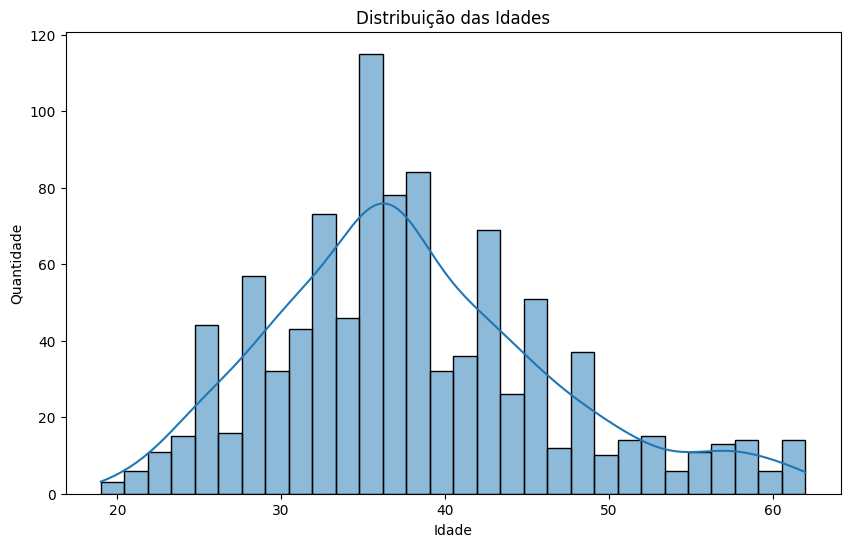

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IDADE'], bins=30, kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

A distribuição de idades revela que a maior parte dos clientes do banco são pessoas entre 30 e 40 anos

Quantidade de pessoas x Gênero

<ipython-input-12-9bc790b003dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENERO', y='CONTAGEM', data=contagem_genero, palette='pastel')


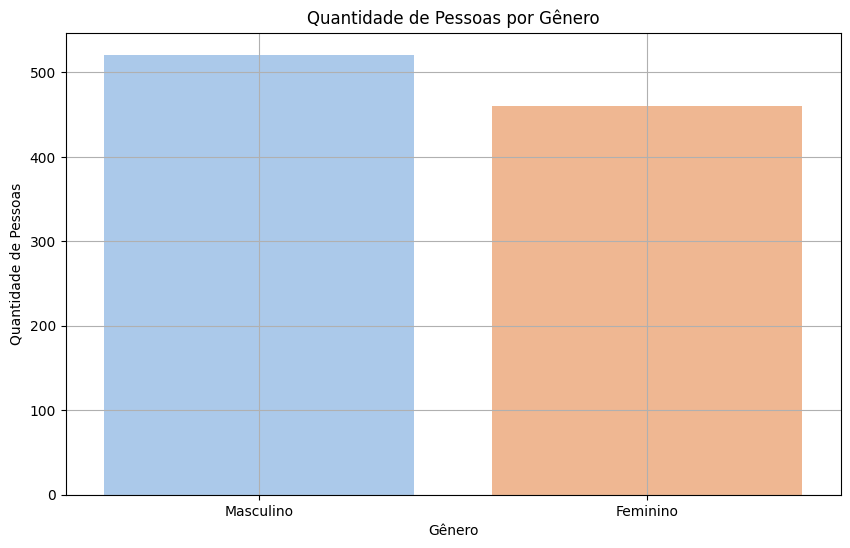

In [12]:
contagem_genero = df['GENERO'].value_counts().reset_index()
contagem_genero.columns = ['GENERO', 'CONTAGEM']

plt.figure(figsize=(10, 6))
sns.barplot(x='GENERO', y='CONTAGEM', data=contagem_genero, palette='pastel')
plt.title('Quantidade de Pessoas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Pessoas')
plt.grid(True)
plt.show()

Há mais homens do que mulheres como clientes do banco

Variabilidade no salário de acordo com o gênero

<ipython-input-13-da9cd15804de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENERO', y='SALARIO', data=df, palette="Set2")


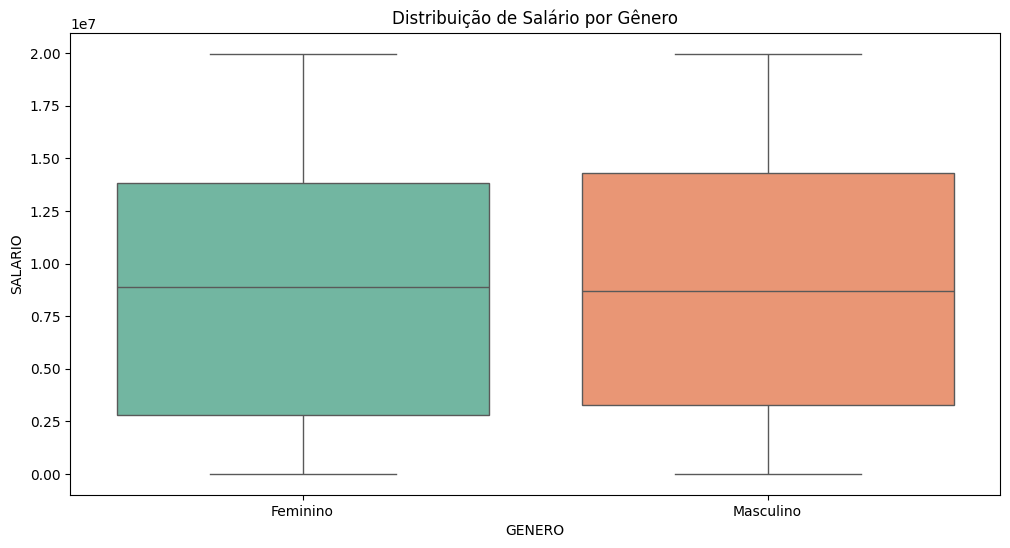

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GENERO', y='SALARIO', data=df, palette="Set2")
plt.title('Distribuição de Salário por Gênero')
plt.show()

A dispersão geral nos salários é semelhante tanto para o público feminino quanto para o masculino. As medianas sugerem que os salários dos dois públicos são também semelhantes. Essas informações já eram esperadas de acordo com a análise prévia feita.

<ipython-input-14-1e0f12eba43d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GENERO', y='SALDO NA CONTA', data=df, palette="Set2")


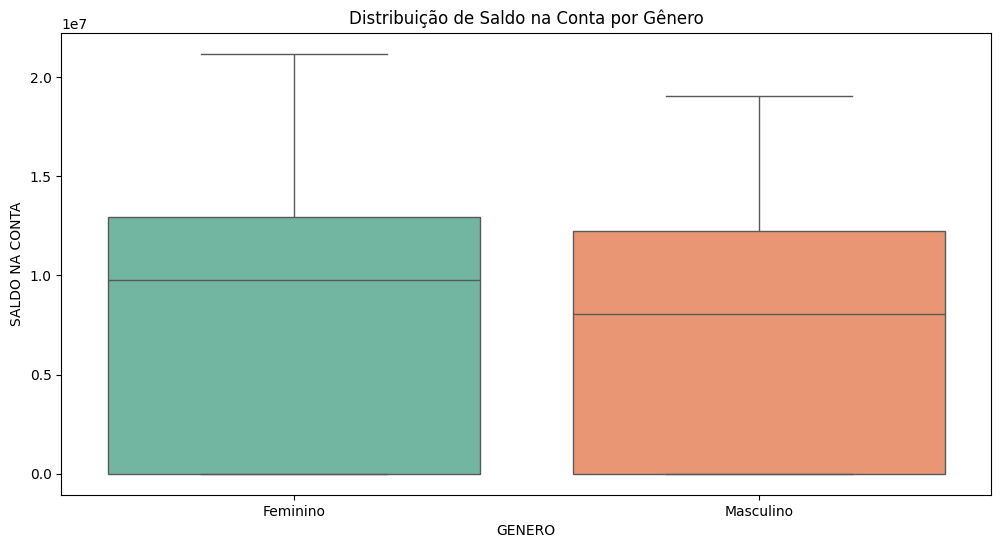

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GENERO', y='SALDO NA CONTA', data=df, palette="Set2")
plt.title('Distribuição de Saldo na Conta por Gênero')
plt.show()

A variabilidade no saldo na conta é maior para o público feminino do que para o masculino, isso pode representar diferenças nos hábitos de consumo ou até mesmo uma maior diversidade nas despesas entre as mulheres.

Assimetrias na distribuição de salário por gênero

<ipython-input-15-c1eda2e0828d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GENERO', y='SALARIO', data=df, palette="Set2", inner="quartile")


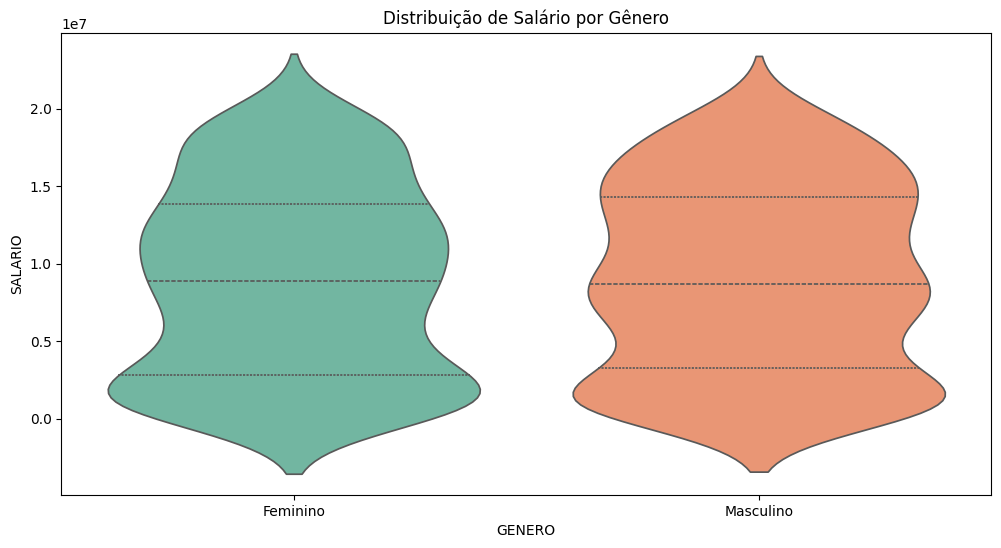

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='GENERO', y='SALARIO', data=df, palette="Set2", inner="quartile")
plt.title('Distribuição de Salário por Gênero')
plt.show()

A distribuição de salários entre as mulheres é um pouco mais achatada quando os valores são maiores

Isso indica que há mais homens com salários maiores

Quantidade de produtos x Faixa Etária

<ipython-input-16-d421045de5c3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  soma_produto = df.groupby('FAIXA_ETARIA')['PRODUTO'].sum().reset_index()
<ipython-input-16-d421045de5c3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FAIXA_ETARIA', y='PRODUTO', data=soma_produto, palette='viridis')


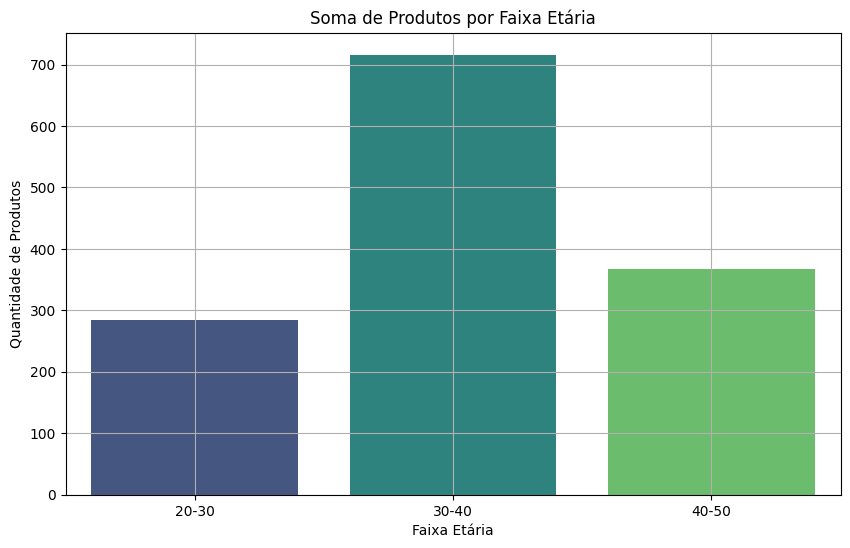

In [16]:
df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
soma_produto = df.groupby('FAIXA_ETARIA')['PRODUTO'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='FAIXA_ETARIA', y='PRODUTO', data=soma_produto, palette='viridis')
plt.title('Soma de Produtos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Produtos')
plt.grid(True)
plt.show()

O público entre 30-40 é o que mais tem produtos no banco

O público feminino também se interessa mais em ter um conta corrente e um cartão de crédito, porém a escolha pela conta corrente em relação ao cartão é mais evidente

Agrupando por estado

In [17]:
colunas_calculo = ['PONTOS', 'IDADE',"BENS","SALDO NA CONTA","SALARIO"]
pd.set_option('display.float_format', '{:.2f}'.format)

df_estado=df.groupby("ESTADO")[colunas_calculo].mean(numeric_only=True)
df_estado = df_estado.reset_index()
df_estado['SALARIO(R$)'] = df_estado['SALARIO'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_estado['SALDO NA CONTA(R$)'] = df_estado['SALDO NA CONTA'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_estado = df_estado.drop(columns=['SALARIO'])
df_estado = df_estado.drop(columns=['SALDO NA CONTA'])
df_estado

,ESTADO,PONTOS,IDADE,BENS,SALARIO(R$),SALDO NA CONTA(R$)
0,BA,637.86,36.29,5.00,"R$ 8.806.110,21","R$ 2.818.841,07"
1,CE,652.48,38.15,5.11,"R$ 8.974.743,17","R$ 8.670.130,96"
2,MA,644.51,38.02,5.08,"R$ 8.709.173,59","R$ 5.500.413,57"
3,MG,658.33,35.22,5.67,"R$ 10.826.898,22","R$ 8.658.141,22"
4,RJ,619.00,40.75,4.75,"R$ 10.507.548,25","R$ 8.668.343,75"
5,SP,609.50,36.25,2.25,"R$ 8.318.383,25","R$ 11.131.988,50"


Média de Pontos e Idade por Estado

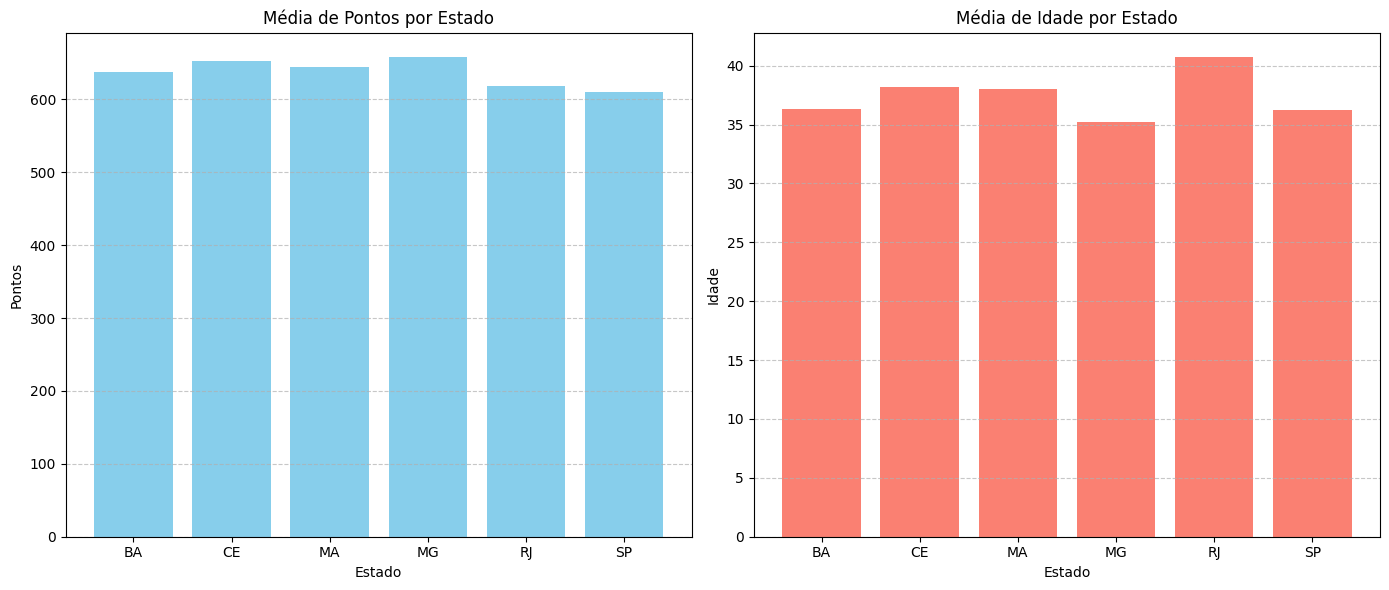

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(df_estado['ESTADO'], df_estado['PONTOS'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Pontos')
plt.title('Média de Pontos por Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.bar(df_estado['ESTADO'], df_estado['IDADE'], color='salmon')
plt.xlabel('Estado')
plt.ylabel('Idade')
plt.title('Média de Idade por Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

As médias de ponto por estado são muito próximas, mas a média de idade demonstra que o público do banco está na faixa de 35 a 40 anos

In [19]:
regiao_map = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste'
}

df['REGIAO'] = df['ESTADO'].map(regiao_map)

df_agrupado = df.groupby('REGIAO').agg({
    'ID': 'nunique',
    'IDADE': 'mean',
    'PONTOS': 'sum',
    'SALARIO': 'mean',
    'SALDO NA CONTA': 'sum'
}).reset_index()

df_agrupado = df_agrupado.rename(columns={'ID': 'QUANTIDADE DE PESSOAS', 'IDADE': 'MEDIA DE IDADE', 'SALARIO': 'MEDIA DE SALARIO'})
df_agrupado['SALARIO(R$)'] = df_agrupado['MEDIA DE SALARIO'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_agrupado['SALDO NA CONTA(R$)'] = df_agrupado['SALDO NA CONTA'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df_agrupado = df_agrupado.drop(columns=['MEDIA DE SALARIO'])
df_agrupado = df_agrupado.drop(columns=['PONTOS'])
df_agrupado = df_agrupado.drop(columns=['SALDO NA CONTA'])
df_agrupado

,REGIAO,QUANTIDADE DE PESSOAS,MEDIA DE IDADE,SALARIO(R$),SALDO NA CONTA(R$)
0,Nordeste,972,38.06,"R$ 8.847.726,10","R$ 6.900.058.103,00"
1,Sudeste,17,36.76,"R$ 10.161.518,24","R$ 157.124.600,00"


Os clientes do banco se concentram mais na região nordeste do que na região sudeste, porém a renda média da região sudeste é maior. Apesar disso, são os clientes do nordeste que tem mais saldo na conta

Produtos x Estado

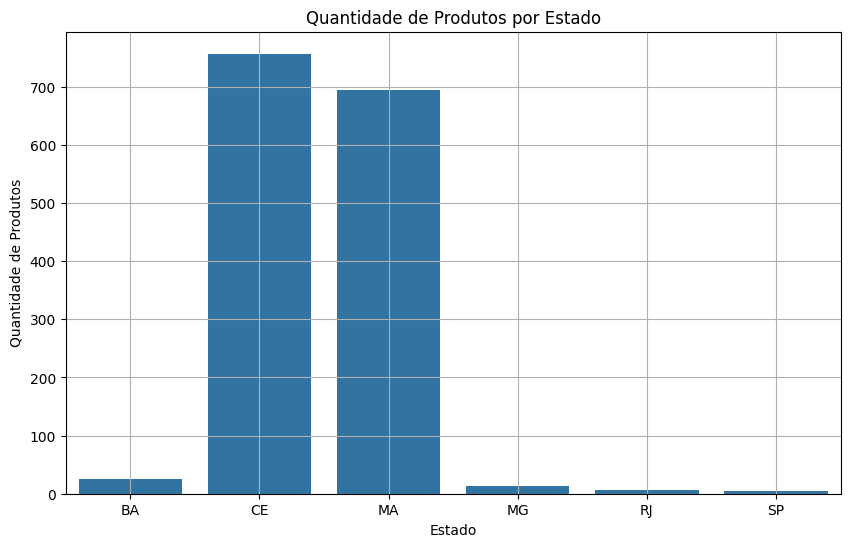

In [20]:
qnt_produto_estado = df.groupby('ESTADO')['PRODUTO'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ESTADO', y='PRODUTO', data=qnt_produto_estado)
plt.title('Quantidade de Produtos por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Produtos')
plt.grid(True)
plt.show()

O estado que mais consome os produtos do banco são o Ceará e o Maranhão


Relação entre os clientes que sairam com a idade

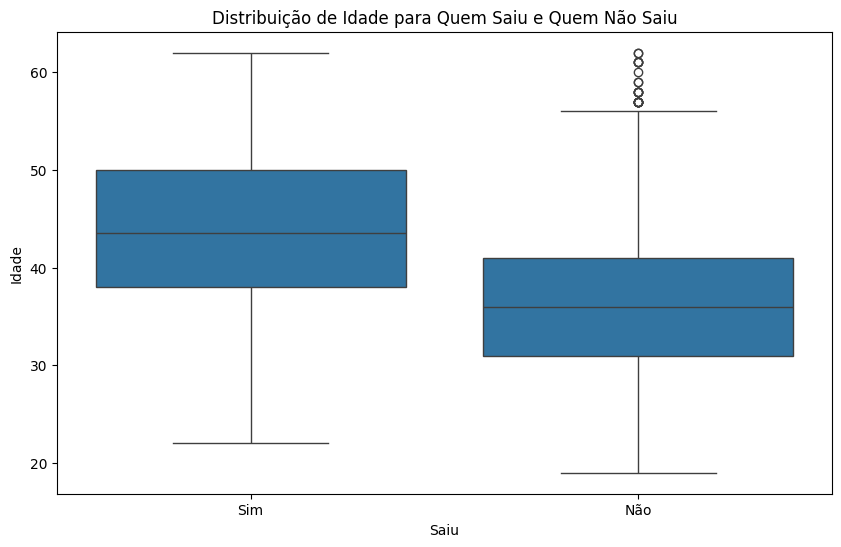

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SAIU', y='IDADE', data=df)
plt.title('Distribuição de Idade para Quem Saiu e Quem Não Saiu')
plt.xlabel('Saiu')
plt.ylabel('Idade')
plt.show()

O banco tem maiores perdas de clientes na faixa etária entre 40 e 50, conseguindo manter clientes entre 30 e 40

Relação entre as saídas e os gêneros

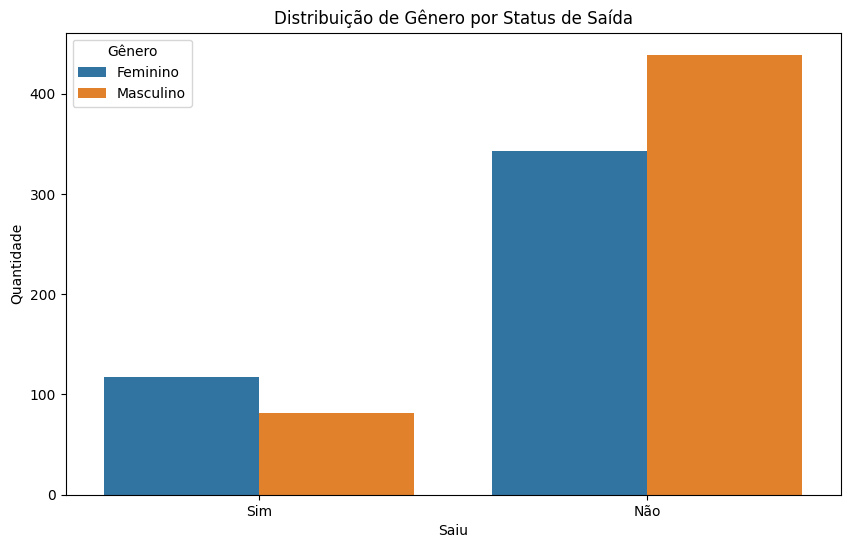

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SAIU', hue='GENERO', data=df)
plt.title('Distribuição de Gênero por Status de Saída')
plt.xlabel('Saiu')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')
plt.show()

Em relação ao gênero, mais mulheres deixaram de ser clientes do banco e mais homens permaneceram como clientes

Quantidade de produtos x Saída

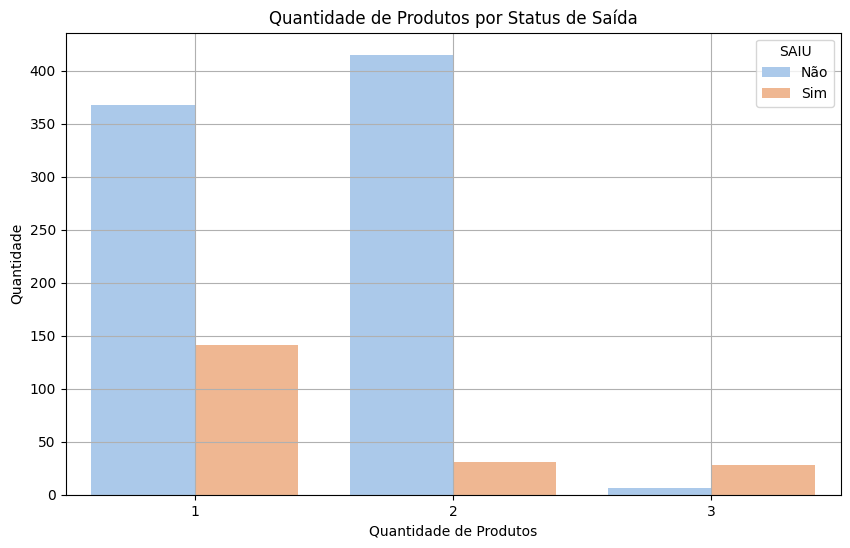

In [23]:
df_filtered = df[df['PRODUTO'].isin([1, 2,3,4])]

contagem_produto_saida = df_filtered.groupby(['PRODUTO', 'SAIU']).size().reset_index(name='Contagem')

plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUTO', y='Contagem', hue='SAIU', data=contagem_produto_saida, palette='pastel')
plt.title('Quantidade de Produtos por Status de Saída')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

Os clientes que só tem um produto no banco tendem a deixá-lo com mais frequência do que alguém com mais produtos

Bens x Saída

<ipython-input-24-304fb1816e03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SAIU', y='BENS', data=media_bens_saida, palette='pastel')


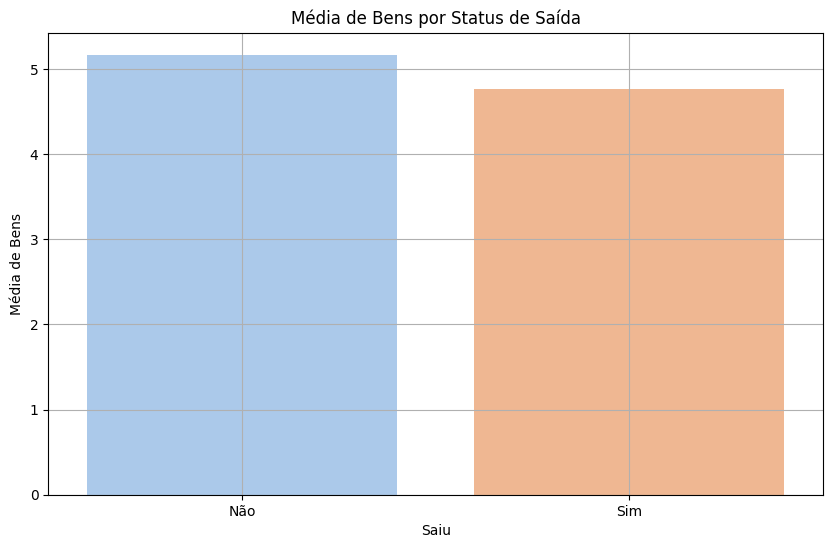

In [24]:
media_bens_saida = df.groupby('SAIU')['BENS'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='SAIU', y='BENS', data=media_bens_saida, palette='pastel')
plt.title('Média de Bens por Status de Saída')
plt.xlabel('Saiu')
plt.ylabel('Média de Bens')
plt.grid(True)
plt.show()

Em média, os clientes com um número de bens superior a 5 tendem a ficar e clientes com menos do 5 tem uma tendência maior a sair

INSIGHTS:


*   Os clientes do banco estão na faixa etária entre 30-40 anos, o que pode significar que ações promocionais voltadas a investimento e previdência sejam mais eficazes.

*  Os clientes de 20-30 anos têm menos produtos no banco, sugerindo uma oportunidade para oferecer contas jovens, crédito acessível e programas de fidelidade.

*  Embora os salários entre homens e mulheres sejam semelhantes, a maior variação no saldo da conta das mulheres oferece uma oportunidade para promover serviços que ajudem a aumentar seus saldos, potencialmente atraindo mais clientes mulheres.

*  Os clientes do banco são majoritariamente da região nordeste, no entanto esses tem uma renda média menor do que os clientes da região sudeste. O banco poderia oferecer produtos financeiros ajustados para a renda da região nordeste

*  O banco perde mais clientes na faixa etária de 40 a 50 anos e tem alta taxa de saída entre clientes com apenas um produto. Uma solução é criar incentivos para clientes dessa faixa etária que têm apenas um produto, para aumentar a fidelização

*  O banco pode implementar estratégias para promover a utilização cruzada de produtos, como ofertas de pacotes de serviços com descontos ou benefícios adicionais para clientes que utilizam múltiplos produtos















